In [1]:
import nest
import matplotlib.pyplot as plt
import numpy as np


def makeMatrix(sources, targets, weights):
    """
    Returns a matrix with the weights between the source and target node_ids.
    """
    aa = np.zeros((max(sources) + 1, max(targets) + 1))

    for src, trg, wght in zip(sources, targets, weights):
        aa[src, trg] += wght

    return aa


def plotMatrix(srcs, tgts, weights, title, pos):
    """
    Plots weight matrix.
    """
    plt.subplot(pos)
    plt.matshow(makeMatrix(srcs, tgts, weights), fignum=False)
    plt.xlim([min(tgts) - 0.5, max(tgts) + 0.5])
    plt.xlabel('target')
    plt.ylim([max(srcs) + 0.5, min(srcs) - 0.5])
    plt.ylabel('source')
    plt.title(title)
    plt.colorbar(fraction=0.046, pad=0.04)




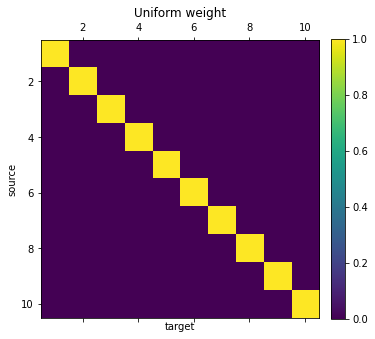

In [2]:
"""
Start with a simple, one_to_one example.
We create the neurons, connect them, and get the connections. From this we can
get the connected sources, targets, and weights. The corresponding matrix will
be the identity matrix, as we have a one_to_one connection.
"""
nest.ResetKernel()

nrns = nest.Create('iaf_psc_alpha', 10)

nest.Connect(nrns, nrns, 'one_to_one')
conns = nest.GetConnections(nrns, nrns)  # This returns a SynapseCollection
# We can get desired information of the SynapseCollection with simple get() call.
g = conns.get(['source', 'target', 'weight'])
srcs = g['source']
tgts = g['target']
weights = g['weight']

# Plot the matrix consisting of the weights between the sources and targets
plt.figure(figsize=(12, 10))
plotMatrix(srcs, tgts, weights, 'Uniform weight', 121)



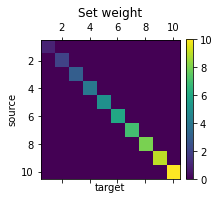

In [3]:
"""
Add some weights to the connections, and plot the updated weight matrix.
"""
# We can set data of the connections with a simple set() call.
w = [{'weight': x * 1.0} for x in range(1, 11)]
conns.set(w)
weights = conns.weight

plotMatrix(srcs, tgts, weights, 'Set weight', 122)



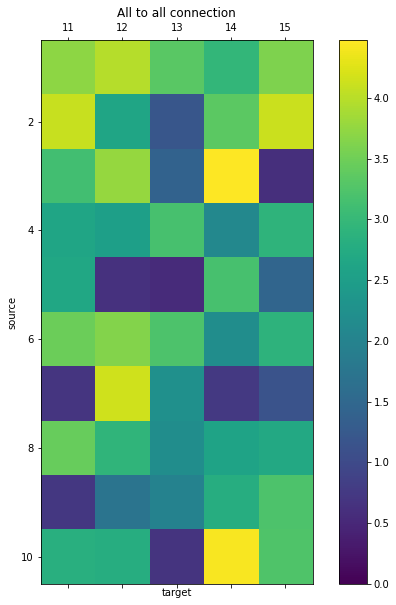

In [4]:
"""
We can also plot an all_to_all connection, with uniformly distributed weights,
and different number of sources and targets.
"""
nest.ResetKernel()

pre = nest.Create('iaf_psc_alpha', 10)
post = nest.Create('iaf_psc_delta', 5)
nest.Connect(pre, post, syn_spec={'weight': nest.random.uniform(min=0.5, max=4.5)})

# Get a SynapseCollection with all connections
conns = nest.GetConnections()
srcs = conns.source
tgts = conns.target
weights = conns.weight

plt.figure(figsize=(12, 10))
plotMatrix(srcs, tgts, weights, 'All to all connection', 111)



In [ ]:
"""
Lastly, we'll do an exmple that is a bit more complex. We connect different
neurons with different rules, synapse models and weight distributions, and get
different SynapseCollections by calling GetConnections with different inputs.
"""
nest.ResetKernel()

nrns = nest.Create('iaf_psc_alpha', 15)
nest.Connect(nrns[:5], nrns[:5], #this here moght be useful, how to "call" the neuron inside of a pop
             'one_to_one',
             {'synapse_model': 'stdp_synapse', 'weight': nest.random.normal(mean=5.0, std=2.0)})
nest.Connect(nrns[:10], nrns[5:12],
             {'rule': 'pairwise_bernoulli', 'p': 0.4},
             {'weight': 4.0})
nest.Connect(nrns[5:10], nrns[:5],
             {'rule': 'fixed_total_number', 'N': 5},
             {'weight': 3.0})
nest.Connect(nrns[10:], nrns[:12],
             'all_to_all',
             {'synapse_model': 'stdp_synapse', 'weight': nest.random.uniform(min=1., max=5.)})
nest.Connect(nrns, nrns[12:],
             {'rule': 'fixed_indegree', 'indegree': 3})

# First get a SynapseCollection consisting of all the connections
conns = nest.GetConnections()
srcs = conns.source
tgts = conns.target
weights = conns.weight

plt.figure(figsize=(14, 12))
plotMatrix(list(srcs), list(tgts), weights, 'All connections', 221)

# Get SynapseCollection consisting of a subset of connections
conns = nest.GetConnections(nrns[:10], nrns[:10])
g = conns.get(['source', 'target', 'weight'])
srcs = g['source']
tgts = g['target']
weights = g['weight']

plotMatrix(srcs, tgts, weights, 'Connections of the first ten neurons', 222)

# Get SynapseCollection consisting of just the stdp_synapses
conns = nest.GetConnections(synapse_model='stdp_synapse')
g = conns.get(['source', 'target', 'weight'])
srcs = g['source']
tgts = g['target']
weights = g['weight']

plotMatrix(srcs, tgts, weights, 'Connections with stdp_synapse', 223)

# Get SynapseCollection consisting of the fixed_total_number connections, but set
# weight before plotting
conns = nest.GetConnections(nrns[5:10], nrns[:5])
w = [{'weight': x * 1.0} for x in range(1, 6)]
conns.set(w)
g = conns.get(['source', 'target', 'weight'])
srcs = g['source']
tgts = g['target']
weights = g['weight']

plotMatrix(srcs, tgts, weights, 'fixed_total_number, set weight', 224)


plt.show()